# Regression Problem - Predicting the Apparent Temperature

*data leakage is going to be prevented by using a large amount of data (weather reports) in the train and test sets

our dummy model - ?

In [105]:
import pandas as pd
import numpy as np

In [106]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline


In [107]:
# read the dataset 
weather =pd.read_csv("weatherHistory[1].csv")

In [108]:
weather

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [109]:
#change misprint
weather=weather.rename(columns={'Loud Cover': 'Cloud Cover'})

# 1. getting to know the data

In [110]:
weather.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


### the numeric variables histogramas:

array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Apparent Temperature (C)'}>],
       [<AxesSubplot:title={'center':'Wind Speed (km/h)'}>,
        <AxesSubplot:title={'center':'Pressure (millibars)'}>],
       [<AxesSubplot:title={'center':'Cloud Cover'}>, <AxesSubplot:>]],
      dtype=object)

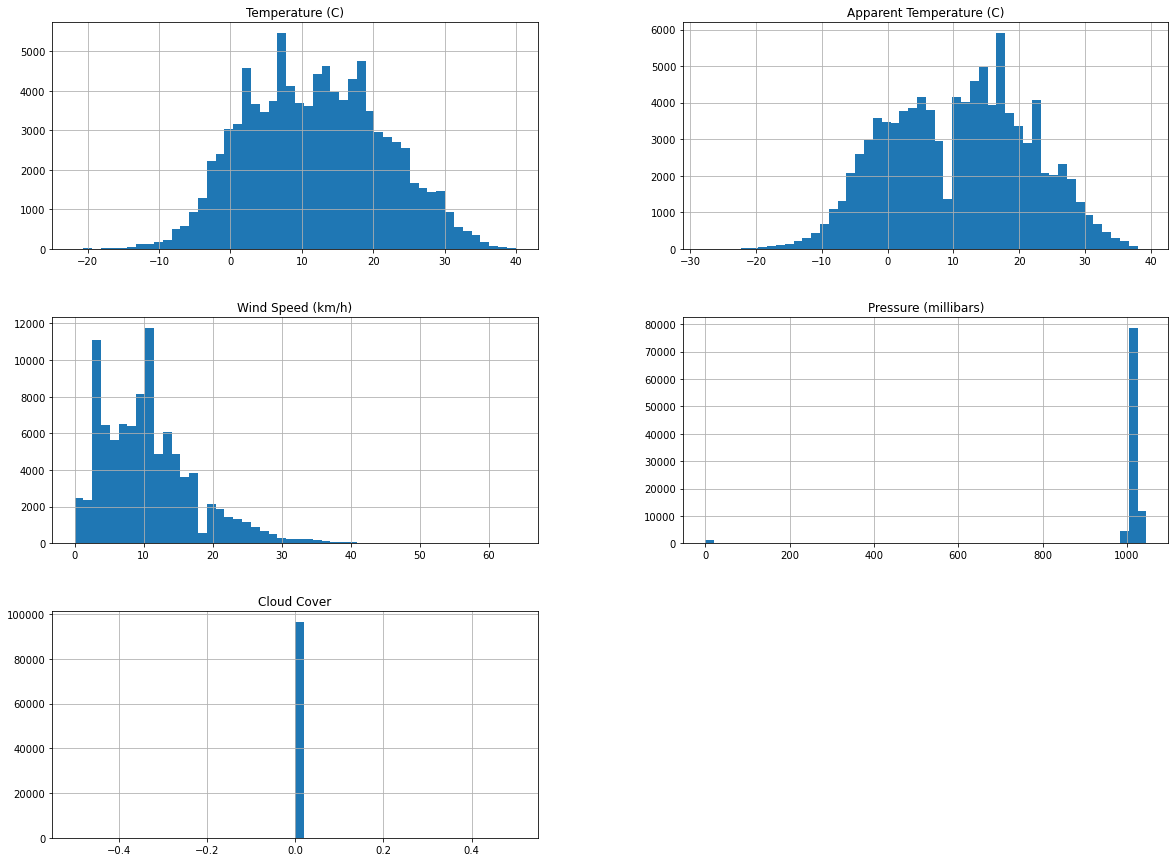

In [111]:
atttibutes_hist = weather[["Temperature (C)", "Apparent Temperature (C)", "Wind Speed (km/h)", "Pressure (millibars)",'Cloud Cover']].hist(bins=50, figsize=(20,15))
atttibutes_hist

as we can see, cloud cover has only values of 0 , so we should delete it 

In [112]:
del weather['Cloud Cover']

### What are the features?
*Formatted Date - includes day, week , month, year

*Summary - sum up of the weather

*Precip Type - which type of raindrops 

*Temperature (C)

*Humidity - Humidity depends on the temperature and pressure .

*Wind Speed (km/h)	

*Wind Bearing (degrees)	- direction of the wind

*Visibility (km) - visibility is a measure of the distance at which an object or light can be clearly discerned.	

*Cloud Cover	(loud cover- misprint)

*Pressure (millibars) - High pressure means the air is heavy . Under high pressure you can generally expect sunny skies and calm weather , whereas Low pressure systems lead to active weather like wind and rain, and also severe weather.

*Daily Summary - daily sum up of the weather


## What is the target variable?

Apparent Temperature : in simple words, Apparent Temperature is the temperature humans percieve, mostly outdoors, as a combination or the actual air temperature, humidity and wind. 

What else do we know?


*we are starting with 12 variables (including the dependent)



<!-- is The perceived temperature in degrees Fahrenheit derived from either a combination of temperature and wind (Wind Chill) or temperature and humidity (Heat Index) for the indicated hour. -
->




<!-- 1. Because the response variable is continuous, this is a regression problem.
2.There are 96453 observations (represented by the rows), and each observation is a weather report from a different date.
 -->

# 2. preprocessing of the data

In [113]:
weather.dropna()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.


In [114]:
weather.isnull().any()

Formatted Date              False
Summary                     False
Precip Type                  True
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

as we can see, there is still nan values in the Precip Type column.

we will handle this by fill in the most common catagory of this feature (rain) instead of the nan values 

In [115]:
print(weather['Precip Type'].value_counts())

rain    85224
snow    10712
Name: Precip Type, dtype: int64


In [116]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
weather['Precip Type'] = weather['Precip Type'].fillna("rain")


#### Precip Type, Temperature, wind speed , Wind Bearing, pressure are features that supposed to be  linked very strongly with the Apparent Temperature (according to the information we read), they are crucial for the prediction of the Apparent Temperature. 

on the other hand, daily summary is not that beneficial,  since we have the column Precip Type and also Summary.

*The term "wind direction" is defined as the compass heading FROM which the wind is blowing

In [117]:
del weather['Daily Summary']

In [118]:
weather

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


now , we will split the 'Formatted Date' feature to 4 different numeric attributes in order to get a better understanding of the data  

In [119]:
import datetime

In [120]:
weather['Formatted Date'] = pd.to_datetime(weather['Formatted Date'],utc=True)

In [121]:
weather['year'] = weather['Formatted Date'].dt.year
weather['month'] = weather['Formatted Date'].dt.month
weather['day'] = weather['Formatted Date'].dt.day
weather['weekday'] = weather['Formatted Date'].dt.weekday

In [122]:
del weather['Formatted Date']

In [123]:
weather

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day,weekday
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006,3,31,4
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006,3,31,4
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,1,5
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1,5
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006,4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,2016,9,9,4
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,2016,9,9,4
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,2016,9,9,4
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,2016,9,9,4


getting rid of outliers:


In [124]:
print(weather['Summary'].value_counts())

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Windy and Mostly Cloudy                   35
Breezy and Foggy                          35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [125]:
weather = weather[(weather['Summary'] != "Dangerously Windy and Partly Cloudy") &( weather['Summary'] != "Breezy and Dry") & (weather['Summary']!="Windy and Dry") ]
print(weather['Summary'].value_counts())

Partly Cloudy               31733
Mostly Cloudy               28094
Overcast                    16597
Clear                       10890
Foggy                        7148
Breezy and Overcast           528
Breezy and Mostly Cloudy      516
Breezy and Partly Cloudy      386
Dry and Partly Cloudy          86
Windy and Partly Cloudy        67
Light Rain                     63
Breezy                         54
Windy and Overcast             45
Humid and Mostly Cloudy        40
Drizzle                        39
Windy and Mostly Cloudy        35
Breezy and Foggy               35
Dry                            34
Humid and Partly Cloudy        17
Dry and Mostly Cloudy          14
Rain                           10
Windy                           8
Humid and Overcast              7
Windy and Foggy                 4
Name: Summary, dtype: int64


In [126]:
weather['Summary']=='Foggy'

0        False
1        False
2        False
3        False
4        False
         ...  
96448    False
96449    False
96450    False
96451    False
96452    False
Name: Summary, Length: 96450, dtype: bool

### replacing a feature with a better one

array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'month'}>]], dtype=object)

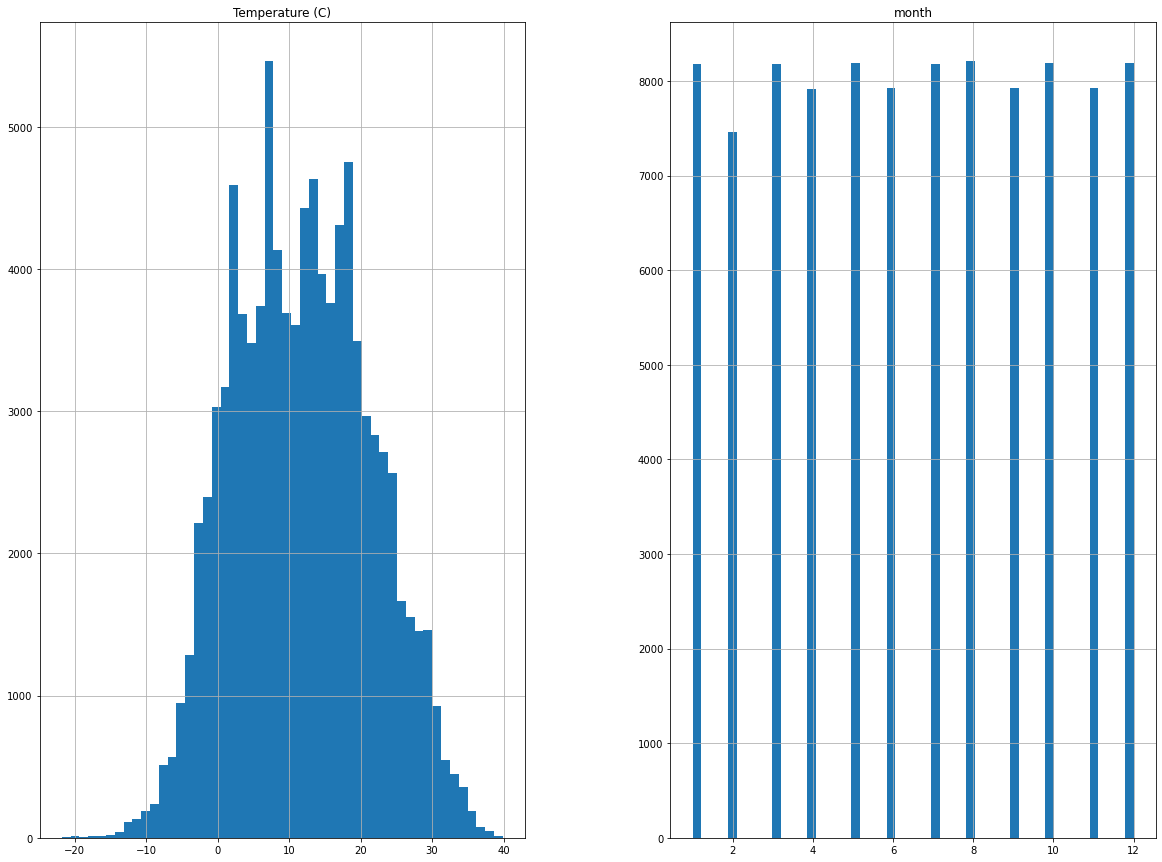

In [127]:
atttibutes_hist = weather[["Temperature (C)","month"]].hist(bins=50, figsize=(20,15))
atttibutes_hist

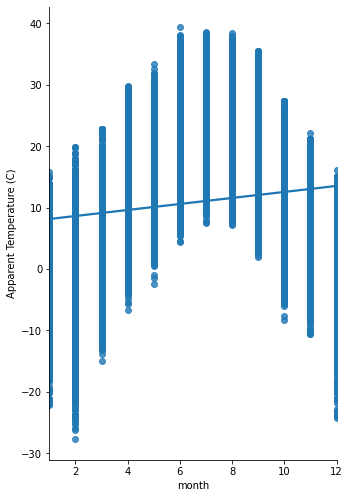

In [128]:
sns.pairplot(weather, x_vars=['month'], y_vars='Apparent Temperature (C)', height=7, aspect=0.7, kind='reg')

In [129]:
#(weather['month']>5) & (weather['month']<9)

#### as we can see above, the Apparent Temperature  is higher in the months that are in the middle of the year.

####  so, we can create a feature that checks if the month is in the middle of the year , or the beggining or the end - we will set the beggining of the middle to be the 5th month, and the end of the middle to be the 9th month

#### this feature will be called: "middle of year" and will have yes/no values.

#### this is a good idea to replace this feature with the "month" feature , since it's giving us a more intuitive relation with the Apparent Temperature, and it probably has a  stronger correlation to it.

In [130]:
weather['middle of year']=(weather['month']>5) & (weather['month']<9)

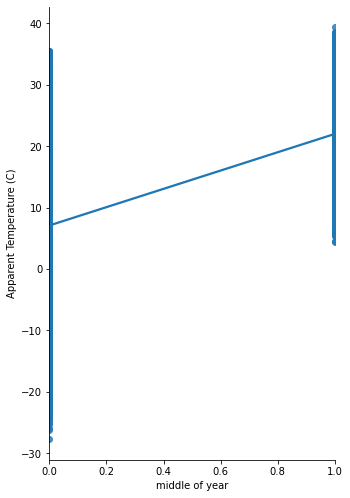

In [131]:
sns.pairplot(weather, x_vars=['middle of year'], y_vars='Apparent Temperature (C)', height=7, aspect=0.7, kind='reg')

In [132]:
#del weather['month']

as we can see in the correlation below:

In [133]:
corr_matrix = weather.corr()
corr_matrix['Apparent Temperature (C)'].sort_values(ascending=False)

Apparent Temperature (C)    1.000000
Temperature (C)             0.992629
middle of year              0.605518
Visibility (km)             0.381730
month                       0.158002
Wind Bearing (degrees)      0.029040
year                        0.017155
day                         0.001729
weekday                     0.000391
Pressure (millibars)       -0.000222
Wind Speed (km/h)          -0.056719
Humidity                   -0.602572
Name: Apparent Temperature (C), dtype: float64

## 1.2 encoding catagorial data

we need to encode Summary, Precip Type and middle of year to numeric columns

In [134]:
weather['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

In [135]:
print(weather['middle of year'].value_counts())

False    72141
True     24309
Name: middle of year, dtype: int64


In [136]:
# or 
print(weather['Precip Type'].value_counts())

rain    85738
snow    10712
Name: Precip Type, dtype: int64


If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1. and because the 'Precip Type' column has only 2 catagoreis:

In [137]:
precip_types = {'rain':0,'snow':1}
weather['precip_type']= weather['Precip Type'].map(precip_types)

In [138]:
weather['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle',
       'Dry and Mostly Cloudy', 'Rain'], dtype=object)

In contrast to the 'precip_type' column , the Summary column has a lot of catagories, so we will use labelEncoder in order to transform the non-numerical labels to numerical labels  


In [139]:
from sklearn import preprocessing
lbl_encoder=preprocessing.LabelEncoder()
weather['summary'] = lbl_encoder.fit_transform(weather['Summary'])
weather['summary'].unique()

array([17, 15, 16, 10,  2,  5,  4,  3, 11, 13, 20, 22,  1, 23,  0,  9, 21,
        7, 19, 12, 14,  6,  8, 18])

now, after we encoded these values, we need to handle another problem:
the machine learning model may assume that there is some correlation between these variables, which will produce the wrong output. So to remove this issue, we will use dummy encoding.

For Dummy Encoding, we will use OneHotEncoder class of preprocessing library.

In [140]:
# #for Country Variable  
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder  
# label_encoder_x= LabelEncoder()  
# weather['Precip Type']= label_encoder_x.fit_transform(weather['Precip Type'])  
# #Encoding for dummy variables  
# onehot_encoder= OneHotEncoder(categories=weather['Precip Type'])    


# pre= onehot_encoder.fit_transform(pre).toarray()  

In [141]:
# dummy encoding of categorical features
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)


In [142]:
ohe.fit_transform(weather[['summary']])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [143]:
ohe.categories_

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23])]

In [144]:
ohe.fit_transform(weather[['precip_type']])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [145]:
ohe.fit_transform(weather[['middle of year']])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [146]:
(weather[['precip_type']]==1.).count()

precip_type    96450
dtype: int64

In [147]:
weather

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day,weekday,middle of year,precip_type,summary
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006,3,31,4,False,0,17
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006,3,31,4,False,0,17
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,1,5,False,0,15
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1,5,False,0,17
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006,4,1,5,False,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,2016,9,9,4,False,0,17
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,2016,9,9,4,False,0,17
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,2016,9,9,4,False,0,17
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,2016,9,9,4,False,0,17


## 1.3 doing onehotencoding at the same time on both of the categorial columns


In [148]:
X= weather.loc[:, ['summary','precip_type','middle of year'] ]

In [149]:
X

,summary,precip_type,middle of year
0,17,0,False
1,17,0,False
2,15,0,False
3,17,0,False
4,15,0,False
...,...,...,...
96448,17,0,False
96449,17,0,False
96450,17,0,False
96451,17,0,False


In [150]:
# use when different features need different preprocessing
from sklearn.compose import make_column_transformer



In [151]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['summary', 'precip_type','middle of year']),
    remainder='passthrough')

In [152]:
X=column_trans.fit_transform(X)

In [153]:
weather

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day,weekday,middle of year,precip_type,summary
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006,3,31,4,False,0,17
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006,3,31,4,False,0,17
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,1,5,False,0,15
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1,5,False,0,17
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006,4,1,5,False,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,2016,9,9,4,False,0,17
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,2016,9,9,4,False,0,17
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,2016,9,9,4,False,0,17
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,2016,9,9,4,False,0,17


now, we will remove Summary and Precip Type columns, cause we alredy made the numeric version of them(summary,precip_type)

In [154]:
del weather['Summary']
del weather['Precip Type']

In [155]:
weather

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day,weekday,middle of year,precip_type,summary
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006,3,31,4,False,0,17
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006,3,31,4,False,0,17
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,1,5,False,0,15
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1,5,False,0,17
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006,4,1,5,False,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,2016,9,9,4,False,0,17
96449,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,2016,9,9,4,False,0,17
96450,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,2016,9,9,4,False,0,17
96451,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,2016,9,9,4,False,0,17


In [156]:
pd.DataFrame(data={'features': weather.columns})

,features
0,Temperature (C)
1,Apparent Temperature (C)
2,Humidity
3,Wind Speed (km/h)
4,Wind Bearing (degrees)
5,Visibility (km)
6,Pressure (millibars)
7,year
8,month
9,day


In [157]:
weather

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day,weekday,middle of year,precip_type,summary
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006,3,31,4,False,0,17
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006,3,31,4,False,0,17
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,1,5,False,0,15
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1,5,False,0,17
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006,4,1,5,False,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,2016,9,9,4,False,0,17
96449,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,2016,9,9,4,False,0,17
96450,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,2016,9,9,4,False,0,17
96451,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,2016,9,9,4,False,0,17


# 3. data visualization

 using the preproccessed dataFrame, before scaling, 
in order to get meaningful and clear picture of the data

In [158]:
# import matplotlib.pyplot as plt
# weather.plot(x='Apparent Temperature (C)', y=["precip_type"])
# plt.show()

In [159]:
AT_column = weather['Apparent Temperature (C)']

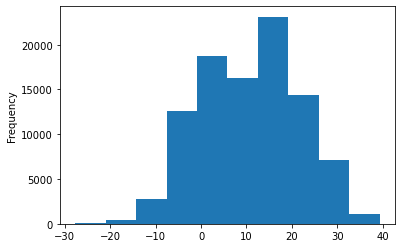

In [160]:
AT_column.plot(kind="hist")
AxesSubplot='Frequency'

##### this means that the most frequent Apparent Temperature is in the range between 10 to 20 celcius

In [161]:
# import matplotlib
# import seaborn as sns
# import matplotlib.pyplot as plt
# import plotly.express as px
# %matplotlib inline


In [162]:
# import matplotlib
# import seaborn as sns
# import matplotlib.pyplot as plt
# import plotly.express as px
# %matplotlib inline

# fig , axs = plt.subplots(ncols=7,nrows=2, figsize=(20,10))
# index=0
# axs= axs.flatten()
# for k ,v in weather.items():
#     sns.boxplot(y=k, data=weather , ax=axs[index])
#     index +=1
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [163]:
# fig , axs = plt.subplots(ncols=7,nrows=2, figsize=(20,10))
# index=0
# axs= axs.flatten()
# for k ,v in weather.items():
#     sns.boxplot(y=k, data=weather , ax=axs[index])
#     index +=1
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# correlations

### correlation matrix

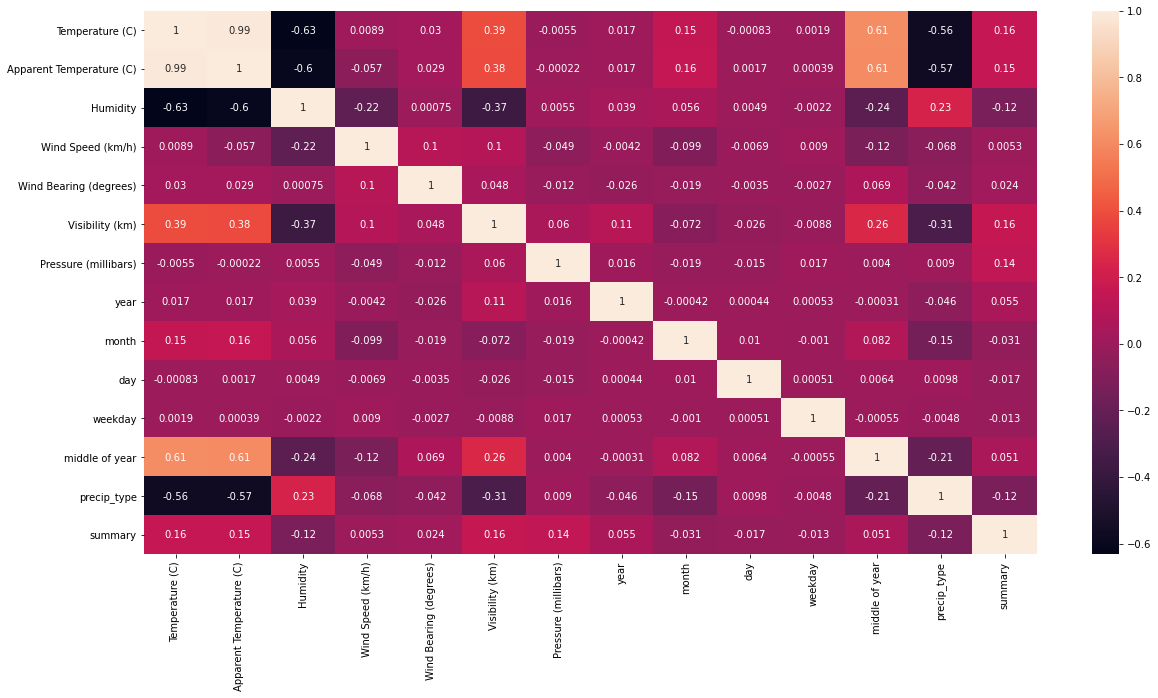

In [164]:
plt.figure(figsize=(20,10))
sns.heatmap(weather.corr(),annot=True);

In [165]:
### see if i can get rid of the temperature var, since he is very simillar to the var we are trying to predict
### or combine between the two

In [166]:
#del weather['Temperature (C)']

as we can see from the heatmap above, the correlation between the Apparent Temperature to the pressure is very low

In [167]:
# del weather['Pressure (millibars)']
del weather['weekday']
del weather['day']

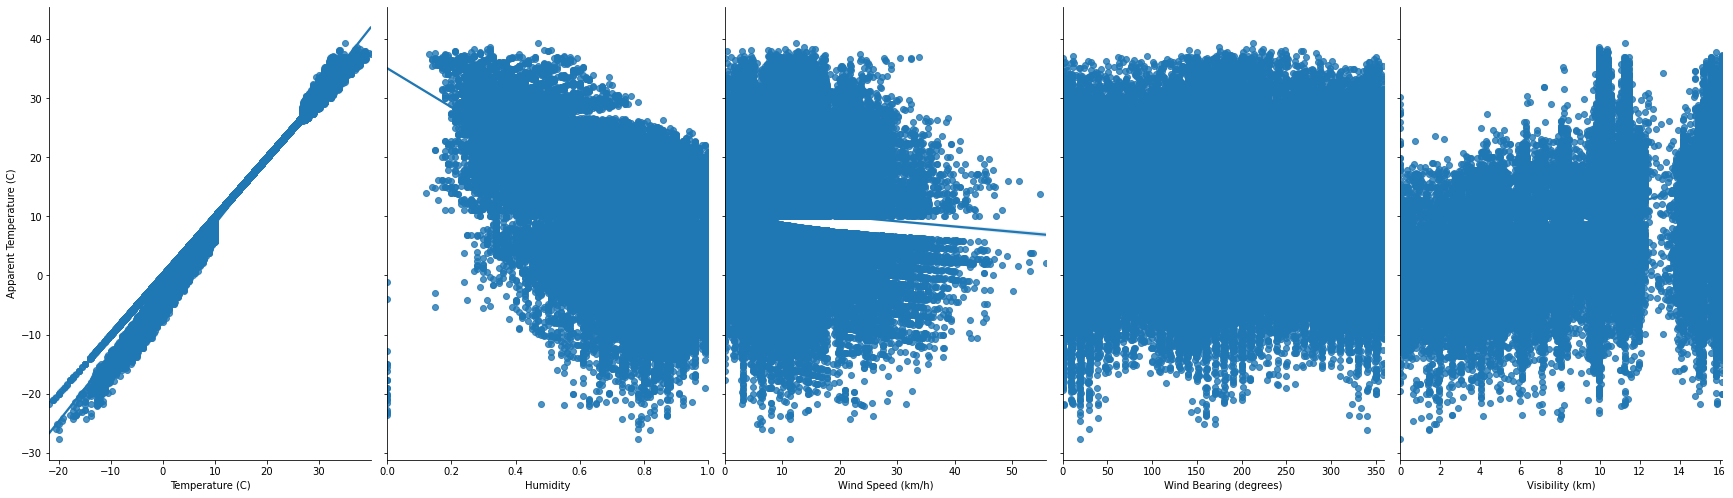

In [168]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(weather, x_vars=['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)'], y_vars='Apparent Temperature (C)', height=7, aspect=0.7, kind='reg')

# 4. choosing a regression metric -

##### Mean Squared Error (MSE)

The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset

when MSE is used as a loos function (regression metric), a lot of weight is given to larger errors because of the square
The units of the MSE are squared units.

## It is a good idea to first establish a baseline MSE for your dataset using a naive predictive model, such as predicting the mean target value from the training dataset.

A model that achieves an MSE better than the MSE for the naive model has skill.

In [169]:
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

In [170]:
# example of calculate the mean squared error
# real value
expected = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
# predicted value
predicted = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
# calculate errors
errors = mean_squared_error(expected, predicted)
# report error
print(errors)

0.35000000000000003


##### Root Mean Squared Error

the units of the RMSE are the same as the original units of the target value that is being predicted, in contrast to MSE.
this is the advantage comapring to MSE.

#### Mean abs error

like RMSE, the units of the error score match the units of the target value that is being predicted.

Unlike the RMSE, the changes in MAE are linear and therefore intuitive.

In [171]:
# example of calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
# real value
expected = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
# predicted value
predicted = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
# calculate errors
errors = mean_absolute_error(expected, predicted)
# report error
print(errors)

0.5


# 5. Split the data to train and test

In [172]:
X = weather.drop(['Apparent Temperature (C)'],axis=1)
y = weather['Apparent Temperature (C)']

In [173]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [174]:
#train=X_train

In [175]:
X_train

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,middle of year,precip_type,summary
43343,16.138889,0.99,13.2020,341.0,5.0715,1014.81,2010,9,False,0,16
73217,3.883333,0.82,14.0070,131.0,14.8120,1015.93,2014,1,False,0,15
68219,12.105556,0.62,25.1160,139.0,15.8263,1013.59,2013,11,False,0,17
33460,5.000000,0.86,22.5400,150.0,9.9820,1013.20,2009,11,False,0,17
35371,9.977778,0.66,19.9479,300.0,11.2056,1016.30,2010,4,False,0,15
...,...,...,...,...,...,...,...,...,...,...,...
6265,14.511111,0.84,5.1198,137.0,14.5866,1018.20,2006,5,False,0,15
54888,-9.444444,0.80,3.2200,340.0,6.1180,1030.00,2012,2,False,1,16
76823,7.800000,0.87,10.9319,90.0,7.9695,1010.18,2014,11,False,0,17
860,19.161111,0.82,0.7728,121.0,9.9820,1012.44,2006,8,True,0,15


In [176]:
X_test.shape

(19290, 11)

In [177]:
y_train

43343    16.138889
73217     0.555556
68219    12.105556
33460     0.794444
35371     7.366667
           ...    
6265     14.511111
54888    -9.444444
76823     5.844444
860      19.161111
15796     2.361111
Name: Apparent Temperature (C), Length: 77160, dtype: float64

## Scaling


את הנירמול לא נעשה על משתנים קטגרויאליים ושמיים שעשינו עליהם כבר encoding  
,כי אין אפשרות להשוות
ניצור גאטא פריים חדש מנורמל
את הויזואליצזיה של הדאטא נעשה על הדאטא פריים המקורי, הלא מנורמל, כדי שנראה את המידע בצורה ברורה ונראה מה המספרים מייצגים

we will do the scaling only on numeric variables i.e not on the categorial . 
we will creaze a normalized dataFrame 

In [178]:
X_train.head()
# delete presure , day month weekday ...
#percip type and summary are catagorials

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,middle of year,precip_type,summary
43343,16.138889,0.99,13.2020,341.0,5.0715,1014.81,2010,9,False,0,16
73217,3.883333,0.82,14.0070,131.0,14.8120,1015.93,2014,1,False,0,15
68219,12.105556,0.62,25.1160,139.0,15.8263,1013.59,2013,11,False,0,17
33460,5.000000,0.86,22.5400,150.0,9.9820,1013.20,2009,11,False,0,17
35371,9.977778,0.66,19.9479,300.0,11.2056,1016.30,2010,4,False,0,15


*we are scaling only the numrical features, i.e , the features we didn't encoded

In [179]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [180]:
scaler_standard = StandardScaler()
scaler_MinMax = MinMaxScaler()

In [181]:
X_train_standardized = X_train.copy()
X_test_standardized = X_test.copy()
X_train_normalized = X_train.copy()
X_test_normalized = X_test.copy()

In [182]:
numerical_features = ["Temperature (C)","Humidity","Wind Speed (km/h)","Visibility (km)","month"]

In [183]:
# Standardization:
scaler_standard.fit(X_train[numerical_features])
X_train_standardized[numerical_features] = scaler_standard.transform(X_train_standardized[numerical_features])

# the scaling is with the the same fitted scaler (by the train data)
#only transform on the test data
X_test_standardized[numerical_features] = scaler_standard.transform(X_test_standardized[numerical_features])

In [184]:
print('note: the mean is 0 and std is 1')
X_train_standardized.describe()[numerical_features].iloc[[1, 2]]

note: the mean is 0 and std is 1


,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),month
mean,-1.368915e-16,2.460030e-16,-4.782567e-17,3.196121e-16,-4.968262e-16
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00


In [185]:
# Normalization:
scaler_MinMax.fit(X_train[numerical_features])
X_train_normalized[numerical_features] = scaler_MinMax.transform(X_train_normalized[numerical_features])

# the scaling is with the the same fitted scaler (by the train data)
#only transform on the test data
X_test_normalized[numerical_features] = scaler_MinMax.transform(X_test_normalized[numerical_features])

In [186]:
print('note: the mean is 0 and std is 1')
X_train_standardized.describe()[numerical_features].iloc[[1, 2]]

note: the mean is 0 and std is 1


,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),month
mean,-1.368915e-16,2.460030e-16,-4.782567e-17,3.196121e-16,-4.968262e-16
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00


In [187]:
X_train_scale=X_train.copy()
y_train_scale=y_train.copy()

deleting the encoded variables (categorials)

In [188]:
# del X_train_scale['summary']
# del X_train_scale['precip_type']

In [189]:
# from sklearn.preprocessing import MinMaxScaler

In [190]:
# scaling= MinMaxScaler()

*on the train set -fit and transform 

In [191]:
#scaling.fit_transform(X_train_scale)

In [192]:
#arr_y_train=np.array(y_train_scale)

In [193]:
#scaling.fit_transform(arr_y_train.reshape(-1,1))

In [194]:
#arr_x_test=np.array(X_train_scale)

*on the test set -transform only 

In [195]:
#scaling.transform(arr_x_test.reshape(-1,1))

In [196]:
#arr_y_test=np.array(y_train_scale)

In [197]:
#scaling.transform(arr_y_test.reshape(-1,1))

## dealing with imbalanced data

*** in this part we do not touch the test set!
 
 
 we will only use the test set for the dummy model , and after the cross validation

the data is imbalanced as we can see from the histogram below

In [216]:
X_train

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,middle of year,precip_type,summary
43343,16.138889,0.99,13.2020,341.0,5.0715,1014.81,2010,9,False,0,16
73217,3.883333,0.82,14.0070,131.0,14.8120,1015.93,2014,1,False,0,15
68219,12.105556,0.62,25.1160,139.0,15.8263,1013.59,2013,11,False,0,17
33460,5.000000,0.86,22.5400,150.0,9.9820,1013.20,2009,11,False,0,17
35371,9.977778,0.66,19.9479,300.0,11.2056,1016.30,2010,4,False,0,15
...,...,...,...,...,...,...,...,...,...,...,...
6265,14.511111,0.84,5.1198,137.0,14.5866,1018.20,2006,5,False,0,15
54888,-9.444444,0.80,3.2200,340.0,6.1180,1030.00,2012,2,False,1,16
76823,7.800000,0.87,10.9319,90.0,7.9695,1010.18,2014,11,False,0,17
860,19.161111,0.82,0.7728,121.0,9.9820,1012.44,2006,8,True,0,15


(array([[3.2021e+04, 3.2658e+04, 1.6592e+04, 2.4200e+03, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.4213e+04, 3.2658e+04, 1.6891e+04, 2.1210e+03, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.8900e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [5.2214e+04, 3.2946e+04, 7.5970e+03, 1.2430e+03, 1.3000e+02,
         9.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.3010e+03, 3.1260e+03, 2.9440e+03, 2.4200e+03, 1.9660e+03,
         1.4760e+03, 1.2390e+03, 1.0530e+03, 1.0370e+03, 1.1220e+03],
        [5.3873e+04, 3.9489e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000

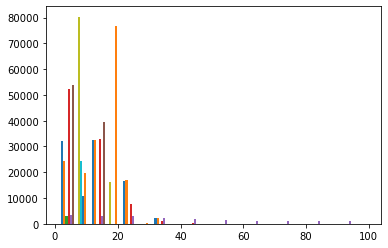

In [198]:
plt.hist(weather, range=(1,100))

In [199]:
# Histogram 
# from random import sample
# data = sample(range(1, 1000), 100)
plt.hist(train) # see if i can change 

NameError: name 'train' is not defined

In [ ]:
# Histogram 
plt.hist(X_train)

In [200]:
X_train_scale= X_train_standardized

In [201]:
y_train_scale = y_train

In [202]:
from imblearn.over_sampling import SMOTE

In [207]:
from collections import Counter
# from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

# summarize class distribution
counter = Counter(y_train)
print(counter)

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)


counter = Counter(y_train)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y_train == label)[0]
    pyplot.scatter(X_train[row_ix, 0], X_train[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Counter({17.77777777777778: 306, 12.77777777777778: 299, 13.88888888888889: 277, 17.22222222222222: 272, 12.22222222222222: 242, 15.0: 239, 16.11111111111111: 235, 22.77777777777778: 229, 18.88888888888889: 216, 11.11111111111111: 214, 20.0: 214, 22.22222222222222: 190, 21.11111111111111: 182, 25.0: 180, 23.88888888888889: 177, 26.11111111111111: 129, 12.755555555555556: 118, 17.755555555555556: 99, 17.200000000000003: 94, 7.222222222222222: 92, 10.555555555555555: 92, 17.15: 91, 17.711111111111112: 89, 17.68888888888889: 88, 15.555555555555555: 88, 12.2: 87, 12.733333333333334: 86, 17.733333333333334: 84, 10.050000000000002: 84, 17.17777777777778: 84, 16.08888888888889: 82, 12.711111111111112: 82, 13.333333333333334: 81, 11.666666666666666: 81, 16.666666666666668: 81, 14.905555555555551: 78, 22.800000000000004: 78, 17.105555555555554: 75, 17.244444444444444: 75, 22.75555555555555: 73, 3.888888888888889: 73, 23.83888888888889: 73, 14.444444444444445: 73, 13.838888888888889: 72, 14.9777

ValueError: Unknown label type: 'continuous'

## dummy model

In [ ]:
from sklearn.dummy import DummyRegressor

from sklearn.metrics import mean_absolute_error as MAE



In [ ]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
R2_score = dummy_regr.score(X_test, y_test)
y_predict = dummy_regr.predict(X_test)
mae = MAE(y_test, y_predict)

errors = mean_squared_error(y_test, y_predict,squared=False)
print ('The dummy model have a mean squared error of '+ str(errors) )

In [ ]:
print('The dummy model have a R2 score of ' + str(R2_score)[:6] + " as expected (around 0), and mean absolute error of " + str(mae)[:4])

In [ ]:
# dummy_regr = DummyRegressor(strategy="mean")
# dummy_regr.fit(X_train, y_train)
# dummy_regr.predict(X_train, y_train)
# dummy_regr.score(X_train, y_train)

my dummy model

the mean of the Apparent Temperatures

In [ ]:
weather['Apparent Temperature (C)'].mean()

# comparing different Regression Models

*cross validation allows us to compare different machine learning methods and get a sense of how well they will work in practice. the advantage here, is that it uses different blocks of data for train and test, and by that, "prepare" the model in the best way to predict outcome for new data  

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [ ]:
LR = LinearRegression()

In [ ]:
y_train

In [ ]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

R2_scores_standardized = cross_val_score(LR, X_train_standardized, y_train, cv=kf)
y_predict_standardized = cross_val_predict(LR, X_train_standardized, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)

R2_scores_normalized = cross_val_score(LR, X_train_normalized, y_train, cv=kf)
y_predict_normalized = cross_val_predict(LR, X_train_normalized, y_train, cv=kf)
mae_normalized = MAE(y_train, y_predict_normalized)

In [ ]:
fig, axes = plt.subplots(1,2)
((ax1, ax2)) = axes

y_predicted = cross_val_predict(LR, X_train_standardized, y_train, cv=kf)
ax1.scatter(y_train, y_predicted, alpha=0.3, color='orange')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title('standardized:')

y_predicted = cross_val_predict(LR, X_train_normalized, y_train, cv=kf)
ax2.scatter(y_train, y_predicted, alpha=0.3, color='red')
ax2.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax2.set_title('normalized:')

plt.show()

In [ ]:
#standadized train set cross validation:

In [ ]:
print("the scores of cross validation are:")
print(R2_scores_standardized)
print()
print("mean R2 is: " + str(R2_scores_standardized.mean())[:5] + " with std of  " + str(R2_scores_standardized.std())[:5] + " and MAE of " + str(mae_standarsized)[:6])

In [ ]:
#normalized train set cross validation:

In [ ]:
print("the scores of cross validation are:")
 print(R2_scores_normalized)
print()
print("mean R2 is: " + str(R2_scores_normalized.mean())[:5] + " with std of  " + str(R2_scores_normalized.std())[:5] + " and MAE of " + str(mae_normalized)[:6])

although the results are the same with normalized and standardized,
we can see below that the feature values are definetly different 

In [ ]:
X_train_normalized

In [ ]:
X_train_standardized